In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.preprocessing.image as p
plt.rc('font',family='AppleGothic')

Found 486 images belonging to 5 classes.


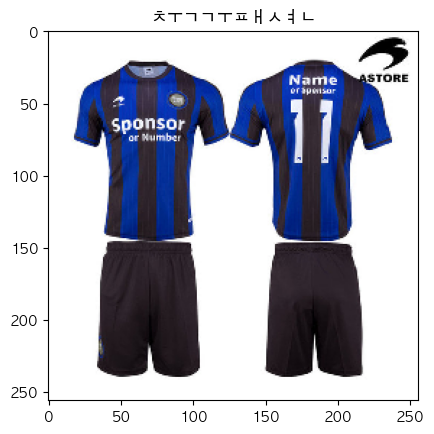

In [2]:
img_gen = p.ImageDataGenerator(rescale= 1./255.)
imgs = img_gen.flow_from_directory('./img_data/',target_size=(256,256))
x_train,y_train=imgs.next()

labels=imgs.class_indices.keys()

y_dict = {0:list(labels)[0],
          1:list(labels)[1],
          2:list(labels)[2],
          3:list(labels)[3],
          4:list(labels)[4]
          }

plt.imshow(x_train[0])
plt.title(y_dict[y_train[0].argmax()])
plt.show()

In [3]:
print(f'x_train.shape => {x_train.shape}')
print(f'y_train.shape => {y_train.shape}')

x_train.shape => (32, 256, 256, 3)
y_train.shape => (32, 5)


In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5,5),
    strides=1,
    activation='relu',
    padding='same',
    input_shape=(256,256,3)
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2,2),
    input_shape=(252,252,32)
))

model.add(tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=(5,5),
    strides=1,
    activation='relu',
    padding='same',
    input_shape=(62,62,32)
))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-13 16:18:24.159696: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 16:18:24.159855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]) 

In [6]:
hist=model.fit(imgs,epochs=32,validation_data=[x_train,y_train])

Epoch 1/32


2022-12-13 16:18:28.708022: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 16:18:28.891296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 190ms/step - loss: 3.9028 - acc: 0.2099 - val_loss: 1.4126 - val_acc: 0.1562
Epoch 2/32


2022-12-13 16:18:31.946249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 191ms/step - loss: 1.4449 - acc: 0.3765 - val_loss: 1.1794 - val_acc: 0.4375
Epoch 3/32
16/16 [==============================] - 3s 181ms/step - loss: 1.2170 - acc: 0.5679 - val_loss: 0.8348 - val_acc: 0.6875
Epoch 4/32
16/16 [==============================] - 3s 181ms/step - loss: 0.6956 - acc: 0.7737 - val_loss: 0.2529 - val_acc: 0.9688
Epoch 5/32
16/16 [==============================] - 3s 180ms/step - loss: 0.2466 - acc: 0.9527 - val_loss: 0.1083 - val_acc: 0.9688
Epoch 6/32
16/16 [==============================] - 3s 183ms/step - loss: 0.0996 - acc: 0.9794 - val_loss: 0.0100 - val_acc: 1.0000
Epoch 7/32
16/16 [==============================] - 3s 180ms/step - loss: 0.0218 - acc: 0.9979 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 8/32
16/16 [==============================] - 3s 180ms/step - loss: 0.0126 - acc: 0.9979 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 9/32
16/16 [==============================] - 3s 180ms/step - loss: 0.0058 - acc:

1/1 [==============================] - 0s 65ms/step


2022-12-13 16:20:09.430585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Text(0.5, 1.0, '스트릿패션')

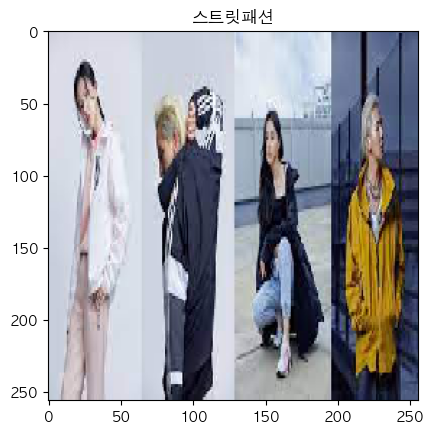

In [8]:
plt.imshow(x_train[6])
plt.title(y_dict[model.predict(x_train[6].reshape(1,256,256,3)).argmax()])

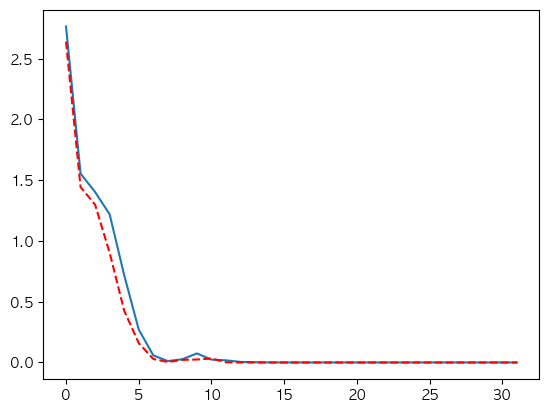

In [12]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'--r')
plt.show()

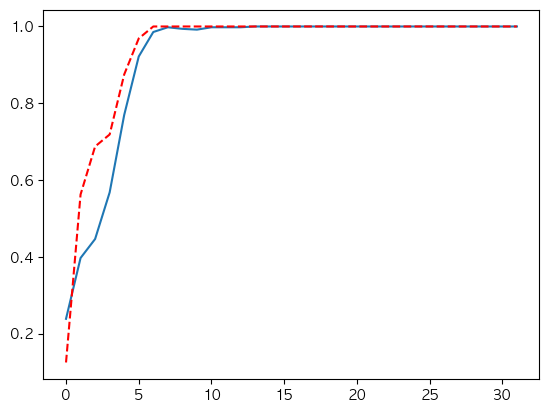

In [13]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'--r')
plt.show()

In [10]:
model.save('fashion_cnn_main.h5')


In [35]:
type(hist.history)

dict

In [13]:
list(labels)

['골프패션', '축구패션', '스트릿패션', '정장패션', '츄리닝패션']

In [14]:
import pickle

with open('model_hist.pickle', 'wb') as f:
    pickle.dump(hist.history, f)
    
with open('labels.pickle', 'wb') as f:
    pickle.dump(list(labels), f)

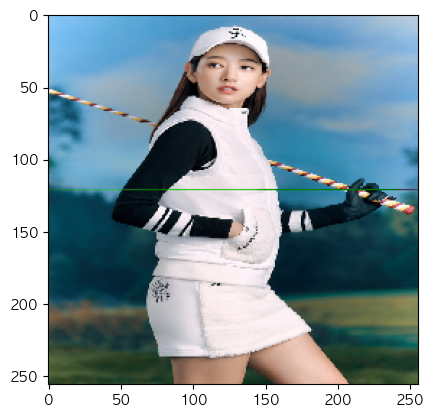

In [37]:
plt.imshow(x_train[9])

In [38]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[9].reshape(1,256,256,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*2))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

1/1 [==============================] - 0s 46ms/step


2022-12-13 16:23:50.336575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


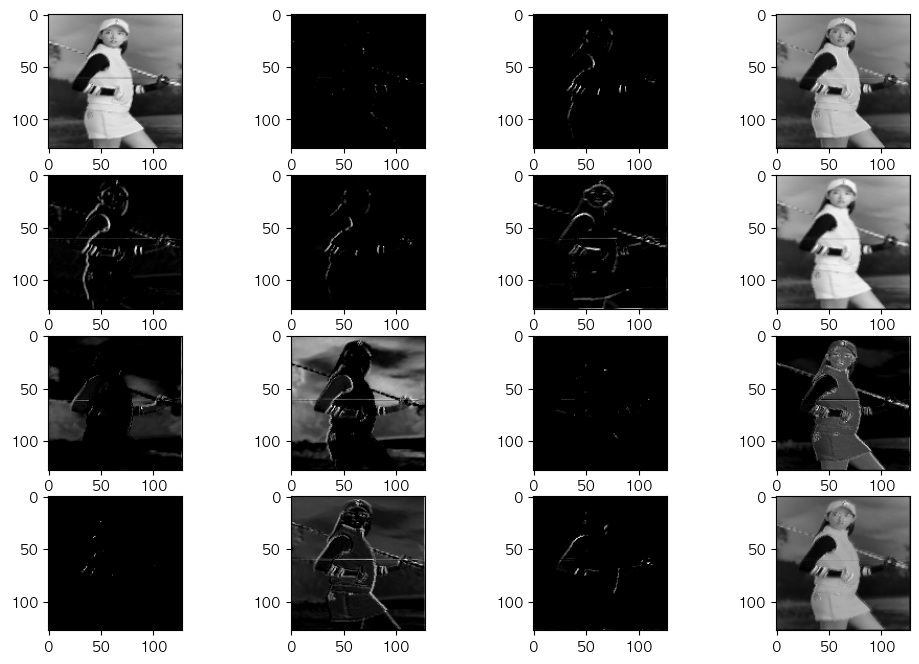

In [39]:
display_activation(activations, 4, 4, 1)

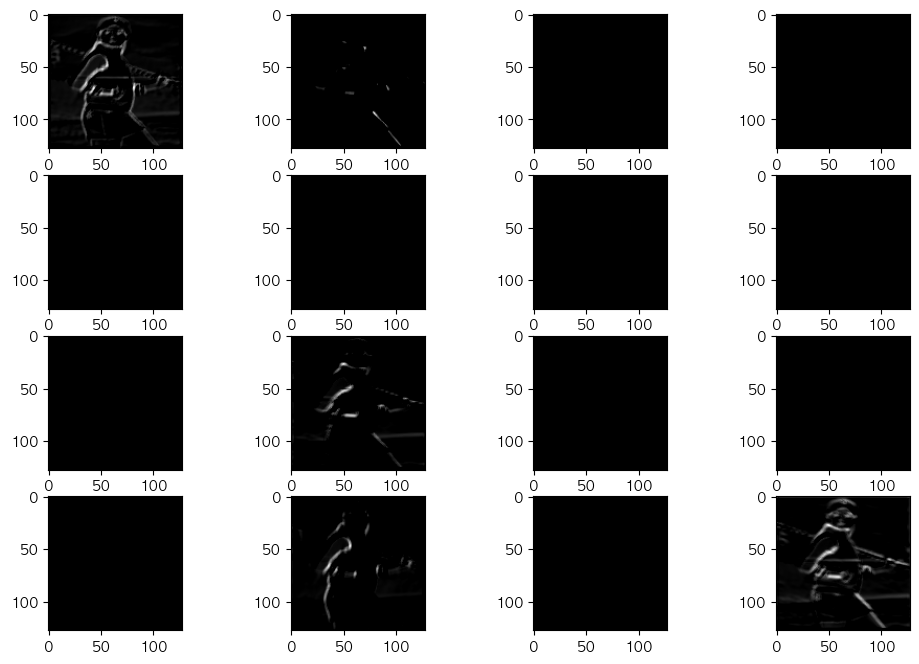

In [40]:
display_activation(activations, 4, 4, 2)